In [27]:
%matplotlib inline

from centrality.eigentrust import EigenTrust
from centrality.indegree import InDegree
from centrality.indegree_positive import InDegreePositive
from centrality.pagerank import PageRank
from evaluations.community.online_discussion_group import OnlineDiscussionGroup
from output.chart import chart
from output.metrics import print_metrics, print_stddev_metrics
from simulation.community import ActionProfile
from simulation.member import Member

# Collusion Test


The implemented simulator is also able to recreate classic attack scenarios, such as
the collusion attack, which is attackers following a mutual malicious strategy in
order to trick the system. A typical case is that these malicious agents vote other
peers negatively without contributing themselves, so that they gain a better reputation
score relative to their peers. In the classroom, it is possible that there might
be students trying to challenge the system for fun. These attackers should still be
ranked lower than normal contributors.

In [28]:
test_name = "Collusion"
community: OnlineDiscussionGroup = OnlineDiscussionGroup()

ALL_CENTRALITY_SCORES = [
  PageRank(),
  InDegree(),
  InDegreePositive()
]

# Possible Actions
actions: ActionProfile = community.action_profile

### Student Archetypes

One group of competent users.

In [29]:
normal = Member("normal", [
  (0.24, actions.post_good_comment),
  (0.06, actions.post_bad_comment),
  (0.28, actions.vote_bad_comment_negative),
  (0.07, actions.vote_any_comment_negative),
  (0.28, actions.vote_good_comment_positive),
  (0.07, actions.vote_any_comment_positive),
])
community.create_members_by_prototype(normal, 15)

Another group of chaotic, malicious users.

In [30]:
mal = Member("mal", [(1, actions.vote_any_comment_negative)])
community.create_members_by_prototype(mal, 15)

## Synthesis

Reputation scores are based on 100 actions by the 20 students for 100 iterations. The charts and metrics are shown below.

Progress: [##################################################] 100.0%
######## Final Metrics: InDegreePositive ########
Distinction: 26.7598014351
Correctness: 0.034482758620689655
Inversion Quality: 1.0

######## Mean & Std. Dev.: InDegreePositive ########
Distinction:       10.580442247008296 (2.5901744311910666)
Correctness:       0.034482758620689655 (0.0)
Inversion Quality: 1.0 (0.0)


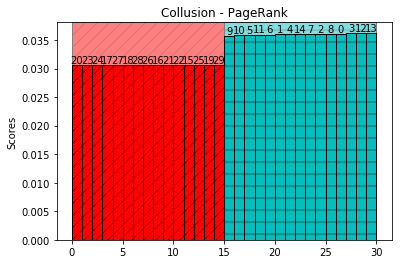

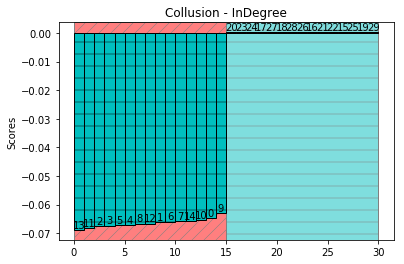

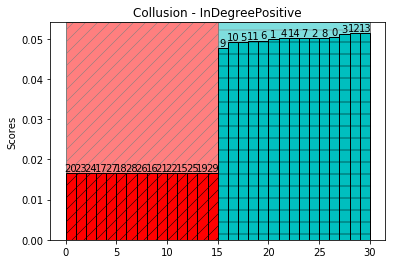

In [31]:
groups = ('mal', 'normal')
colors = {'mal': 'r', 'normal': 'c'}
results = community.simulate(ALL_CENTRALITY_SCORES, 100, 100)
for (name, result, intermediate_results) in results:
  c = chart(result, groups, colors, test_name + " - " + name)

print_metrics(name, result, groups)
print_stddev_metrics(name, intermediate_results, groups)